In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# data_folder = 'drive/My Drive/dataset/'

In [42]:
import pandas as pd
# file = pd.read_csv(data_folder + 'lyrics.csv')
file = pd.read_csv('lyrics.csv')

In [43]:
file.head(5)

,index,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


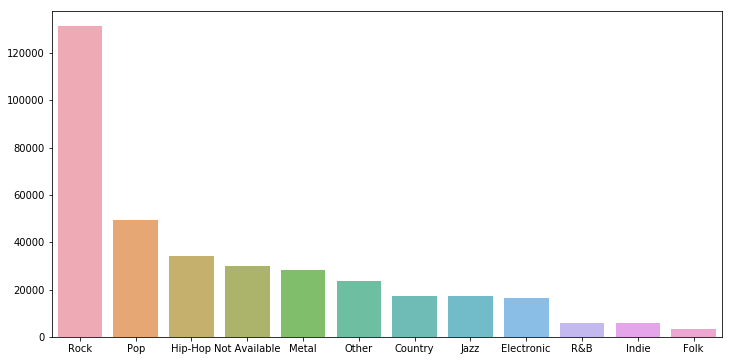

In [44]:
# sns.barplot(x='genre',data=file)
is_dup = file['genre'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(is_dup.index, is_dup.values, alpha=0.8)

In [67]:
def datapreprocess(x):
    small_case = x.lower()
    remove_punct = small_case.translate(str.maketrans('', '', string.punctuation))
    remove_newline = re.sub(r'\n',r' ',remove_punct)
#     remove_newline = remove_punct.replace('\n',' ')
    return remove_newline

In [59]:
# file['process_lyrics'] = file['lyrics'].apply(datapreprocess)
file.dropna(axis=0,inplace=True)

In [68]:
file['process_lyrics'] = file['lyrics'].map(datapreprocess)

In [69]:
file.head()

,index,song,year,artist,genre,lyrics,process_lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu...",oh baby how you doing you know im gonna cut ri...
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see...",playin everything so easy its like you seem so...
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...,if you search for tenderness it isnt hard to f...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...",oh oh oh i oh oh oh i verse 1 if i wrote a boo...
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po...",party the people the people the party its popp...


' abacdfd asdfasd '